* 下記の記事の写経
* [ディープラーニング実践入門 〜 Kerasライブラリで画像認識をはじめよう！](https://employment.en-japan.com/engineerhub/entry/2017/04/28/110000)

In [64]:
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
np.random.seed(1111)

In [31]:
%matplotlib inline

import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()

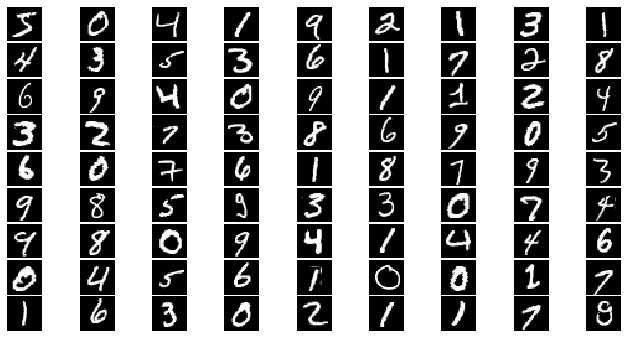

In [32]:
fig = plt.figure(figsize=(9,9))

fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i].reshape((28,28)),cmap="gray")

In [33]:
num_classes = 10
x_train = x_train.reshape(60000,784)
x_test  = x_test.reshape(10000,784)
x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")

x_train /= 255
x_test  /= 255

y_train = y_train.astype('int32')
y_test  = y_test.astype('int32')
print(y_test.shape)
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test, num_classes)

(10000,)


In [34]:
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [35]:
y_test.shape

(10000, 10)

# NN

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [37]:
batch_size =128
epochs = 20
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.2455 - acc: 0.9246 - val_loss: 0.1126 - val_acc: 0.9657
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.1027 - acc: 0.9690 - val_loss: 0.0800 - val_acc: 0.9773
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.0738 - acc: 0.9772 - val_loss: 0.0909 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.0611 - acc: 0.9814 - val_loss: 0.0759 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0756 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.0435 - acc: 0.9869 - val_loss: 0.0730 - val_acc: 0.9826
Epoch 7/20
60000/60000 [==============================] - 8s - loss: 0.0394 - acc: 0.9884 - val_loss: 0.0782 - val_acc: 0.9808
Epoch 8/20
60000/60000 [==============================] - 8s 

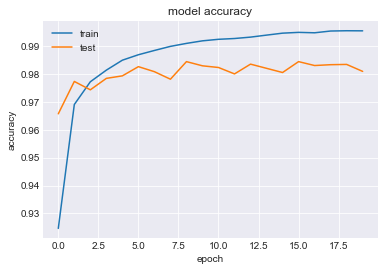

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

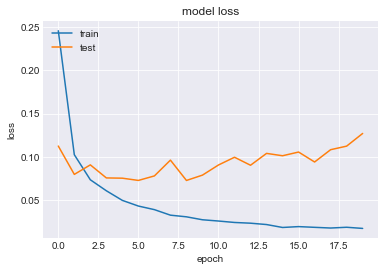

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

# CNN

In [40]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [44]:
# backendの入力チャネルの順番の確認(TensorFlow)
K.image_data_format()

'channels_last'

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
x_test.shape

(10000, 28, 28)

In [48]:
y_train.shape

(60000,)

In [52]:
type(x_train[0][0][0])

numpy.uint8

In [54]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0],img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [56]:
type(y_train[0])

numpy.uint8

In [57]:
y_train = y_train.astype('int32')
y_test  = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [59]:
y_test.shape

(10000, 10)

In [61]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [62]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size,
         epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 168s - loss: 0.3223 - acc: 0.9015 - val_loss: 0.0789 - val_acc: 0.9761
Epoch 2/12
60000/60000 [==============================] - 155s - loss: 0.1149 - acc: 0.9658 - val_loss: 0.0507 - val_acc: 0.9844
Epoch 3/12
60000/60000 [==============================] - 155s - loss: 0.0851 - acc: 0.9748 - val_loss: 0.0411 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 166s - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0384 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 169s - loss: 0.0639 - acc: 0.9809 - val_loss: 0.0354 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 158s - loss: 0.0555 - acc: 0.9835 - val_loss: 0.0315 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 159s - loss: 0.0527 - acc: 0.9847 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 8/12
60000/60000 [=======================